In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve, generate_binary_structure
import matplotlib.animation as animation
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

# Ising model

The Ising model describes magnetic dipoles in one of two states, either +1 or -1. These spins are arranged in a graph, typically a lattice, where each spin can interact with its neighbouring spins. The total energy of the system in $\alpha_k$ state is the expectation value of the sum of individual potentials:$$E_{\alpha_k} = - J \sum_{\braket{i,j}}s_{i}s_{j},$$where J is called the exchange energy and is a measure of the strength of the spin–spin interaction. The alignment of spins in equilibrium depends on the sign of the exchange energy, J. If J is greater than zero, neighbouring spins tend to align in the lowest energy state. The ground state will be a ferromagnet at low temperatures, with all spins aligned. If J is less than zero, neighbouring spins tend to have opposite alignment in the lowest energy state. The ground state will be an antiferromagnet at low temperatures, with alternating spins.

# Metropolis algorithm:

The algorithm is initialised with a fixed state ($\alpha_j$) of a given temperature and spin configuration and runs until a thermal equilibrium is reached. Continued application produces a statistical fluctuation from which thermodynamic properties can be devised. The method is made up of the following main steps:
1. The algorithm takes the current state $\alpha_j$.
2. Generates a new condition $\alpha_i$, by flipping a random spin in the system.
3. Calculates the energies of the current condition $E_j$ and the new condition $E_i$
    - if $E_j \leq E_i$: The new configuration is accepted as the new state of the system
    - if $E_j > E_i$: The new configuration is accepted as the new state with a probability of $P = \exp(-\Delta E/k_BT)$
4. Return to step 1.

An inherent problem of this method is that because of the 2N possible configurations of the system computing time can be significant.

# The 1D Ising Chain

## Algorithms

In [2]:
def LatticeEnergy(lattice = np.array):
    "A function to calculate the energy of a given lattice state"
    neigbours = generate_binary_structure(1, 1) 
    neigbours[1] = False
    spin_energies = -lattice * convolve(lattice, neigbours, mode='constant', cval=0)
    return spin_energies.sum()

def InitialState(N = int, percentage = int):
    "The algorithm creates a 21 spin lattice system with a percentage of how many spins should be up"
    random_values = np.random.random(N) # random values between 0 and 1
    lattice = np.zeros(N) # A grid of zeros
    lattice[random_values>=percentage] = 1 
    lattice[random_values<percentage] = -1
    return lattice

def MetropolisAlgorithm(initial_lattice, N = int, times = int, BJ = float, state_save = "Off"):
    "An algorithm that runs the Metropolis simulation on a spin system"
    # Generating the initial state
    current_lattice = initial_lattice.copy() 
    energy = LatticeEnergy(current_lattice)
    
    # Arrays that contain the total energy and spin of the system at given time steps
    spin_evolution = np.zeros(times-1)
    energy_evolution = np.zeros(times-1)
    state_evolution = [current_lattice.copy()]
    
    for t in range(0,times-1):
        if state_save == "On":
            old_state = current_lattice.copy()
            state_evolution.append(old_state)
        # 2. pick random point on array and flip spin
        x = np.random.randint(0,N)
        #y = np.random.randint(0,N)
        spin_i = current_lattice[x] #initial spin
        spin_j = spin_i*-1 #proposed spin flip
        
        # Compute the change of the system energy
        E_i = 0
        E_j = 0
        if x > 0:
            E_i += -spin_i*current_lattice[x-1]
            E_j += -spin_j*current_lattice[x-1]
        if x < N-1:
            E_i += -spin_i*current_lattice[x+1]
            E_j += -spin_j*current_lattice[x+1]
        
        # Change the state according to the change of energy
        dE = E_j-E_i
        if (dE > 0)*(np.random.random() < np.exp(-BJ*dE)):
            current_lattice[x]=spin_j
            energy += dE
            #state_evolution.append(current_lattice)
        elif dE <= 0:
            current_lattice[x]=spin_j
            energy += dE
            #state_evolution.append(current_lattice)
            
        spin_evolution[t] = current_lattice.sum()
        energy_evolution[t] = energy
        #state_evolution.append(current_lattice)
            
    return spin_evolution, energy_evolution , state_evolution

## Simulation

In [3]:
N = 2500
BJ = 0.7
BJ2 = 0.2
lattice = InitialState(N, 0.75)
display_lattice = InitialState(50, 0.75)
spins, energies, states = MetropolisAlgorithm(lattice, N, 500000, BJ)
spins1, energies1, states1 = MetropolisAlgorithm(display_lattice, 50, 500000, BJ, "On")
spins2, energies2, states2 = MetropolisAlgorithm(lattice, N, 500000, BJ2)

### Displaing results

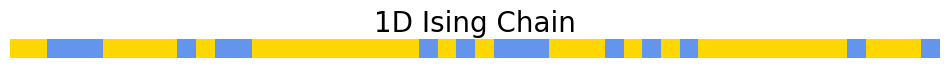

In [4]:
fig = plt.figure(figsize=(12,5))
cmap=ListedColormap(["gold","cornflowerblue"])
plt.imshow(np.expand_dims(states1[3], axis=0), cmap=cmap)
plt.title(r"1D Ising Chain", size = 20)
plt.axis("off")
plt.savefig("1DIsing_Chain.jpg", bbox_inches='tight')

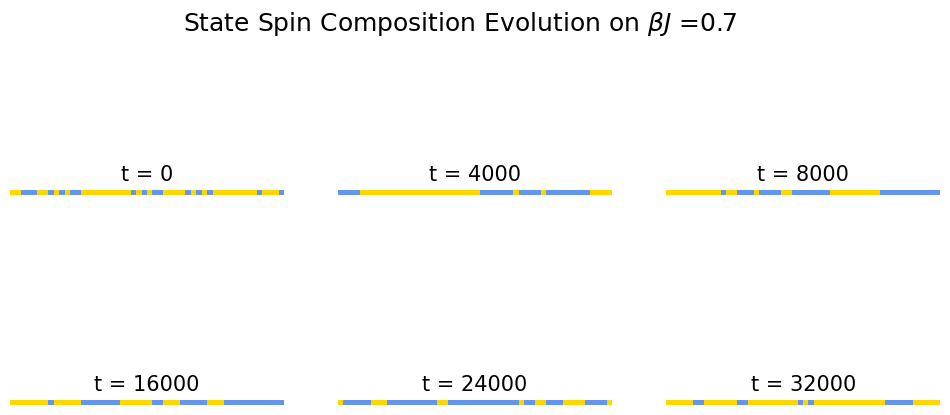

In [5]:
# Plotting configurations of the system at different time steps
displayed_states = [states1[0], states1[4000], states1[8000], states1[16000], states1[24000], states1[32000]]
fig = plt.figure(figsize=(12,5))
fig.tight_layout()
fig.suptitle(rf'State Spin Composition Evolution on $\beta J$ ={BJ}', y=1.07, size=18)
plt.subplot(2, 3, 1)
plt.imshow(np.expand_dims(displayed_states[0], axis=0), cmap=cmap)
plt.title(r"t = 0", size = 15)
plt.axis("off")
plt.subplot(2, 3, 2)
plt.imshow(np.expand_dims(displayed_states[1], axis=0), cmap=cmap)
plt.title(r"t = 4000", size = 15)
plt.axis("off")
plt.subplot(2, 3, 3)
plt.imshow(np.expand_dims(displayed_states[2], axis=0), cmap=cmap)
plt.title(r"t = 8000", size = 15)
plt.axis("off")
plt.subplot(2, 3, 4)
plt.imshow(np.expand_dims(displayed_states[3], axis=0), cmap=cmap)
plt.title(r"t = 16000", size = 15)
plt.axis("off")
plt.subplot(2, 3, 5)
plt.imshow(np.expand_dims(displayed_states[4], axis=0), cmap=cmap)
plt.title(r"t = 24000", size = 15)
plt.axis("off")
plt.subplot(2, 3, 6)
plt.imshow(np.expand_dims(displayed_states[5], axis=0), cmap=cmap)
plt.title(r"t = 32000", size = 15)
plt.axis("off")
plt.savefig("2DFerro_states.jpg", bbox_inches='tight')

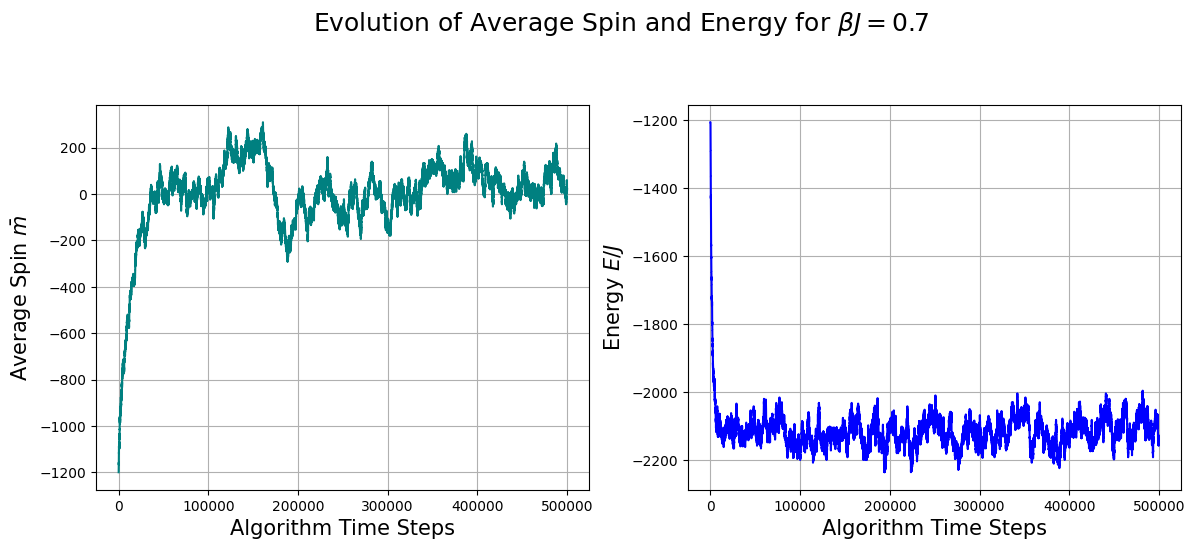

In [6]:
fig = plt.figure(figsize=(14,5))
fig.tight_layout()
fig.suptitle(rf'Evolution of Average Spin and Energy for $\beta J=${BJ}', y=1.07, size=18)
plt.subplot(1, 2, 1)
plt.plot(spins, color = "teal")
plt.xlabel('Algorithm Time Steps', size = 15)
plt.ylabel(r'Average Spin $\bar{m}$', size = 15)
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(energies, color = "blue")
plt.xlabel('Algorithm Time Steps', size = 15)
plt.ylabel(r'Energy $E/J$', size = 15)
plt.grid()
plt.savefig("1DFerro_lowtemp.jpg", bbox_inches='tight')

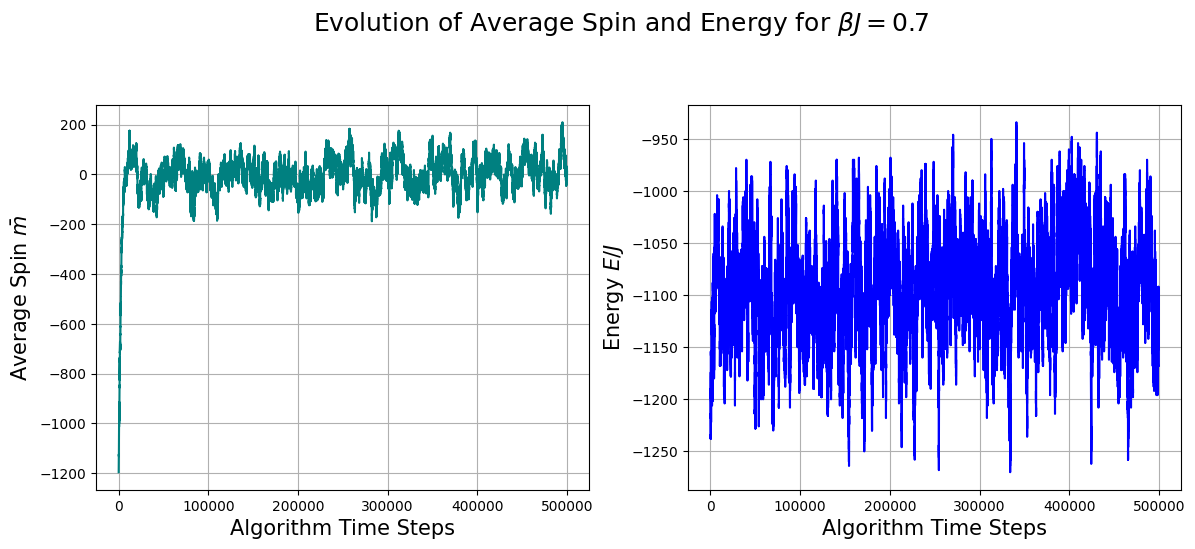

In [7]:
fig = plt.figure(figsize=(14,5))
fig.tight_layout()
fig.suptitle(rf'Evolution of Average Spin and Energy for $\beta J=${BJ}', y=1.07, size=18)
plt.subplot(1, 2, 1)
plt.plot(spins2, color = "teal")
plt.xlabel('Algorithm Time Steps', size = 15)
plt.ylabel(r'Average Spin $\bar{m}$', size = 15)
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(energies2, color = "blue")
plt.xlabel('Algorithm Time Steps', size = 15)
plt.ylabel(r'Energy $E/J$', size = 15)
plt.grid()
plt.savefig("1DFerro_hightemp.jpg", bbox_inches='tight')

MovieWriter ffmpeg unavailable; using Pillow instead.


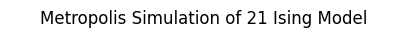

In [8]:
fig = plt.figure(figsize=(5,2))
plt.axis("off")
plt.title("Metropolis Simulation of 21 Ising Model")
ims = []
for i in range(len(states1[0::200])):
    im = plt.imshow(np.expand_dims(states1[0::200][i], axis=0), cmap=cmap, rasterized=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200,
    repeat_delay=1000)
ani.save('1DIsing_animation.gif')

## Simulation at different temperatures

In [9]:
def TemperatureDependance(lattice, BJ_list):
    "A function to calculate the final average spin and energy of a system on different energies"
    # Arrays to contain the data
    spin_means = np.zeros(len(BJ_list))
    E_means = np.zeros(len(BJ_list))
    E_stds = np.zeros(len(BJ_list))
    for i, bj in enumerate(BJ_list):
        spins, energies, states = MetropolisAlgorithm(lattice, 50, 500000, bj)
        spin_means[i] = spins[-100000:].mean()
        E_means[i] = energies[-100000:].mean()
        E_stds[i] = energies[-100000:].std()
    return spin_means, E_means, E_stds

BJs = np.arange(0, 3, 0.1)
ms, E_means, E_stds = TemperatureDependance(lattice, BJs)

In [10]:
def Specific_heat(BJ):
    top = BJ**2
    bottom = np.cosh(BJ)**2
    return top/bottom

BJ_range = np.linspace(0,20,1000)
Cv = []
for i in BJ_range:
    Cv.append(Specific_heat(i))

C:\Users\jmton\AppData\Local\Temp\ipykernel_41264\2044367989.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/BJs, E_stds*BJs/10, ls = "", marker = "o", markersize = 4, label='Simulation')
C:\Users\jmton\AppData\Local\Temp\ipykernel_41264\2044367989.py:12: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/BJs, abs(ms/N**2), ls = "", marker = "o", markersize = 4, label='Simulation')


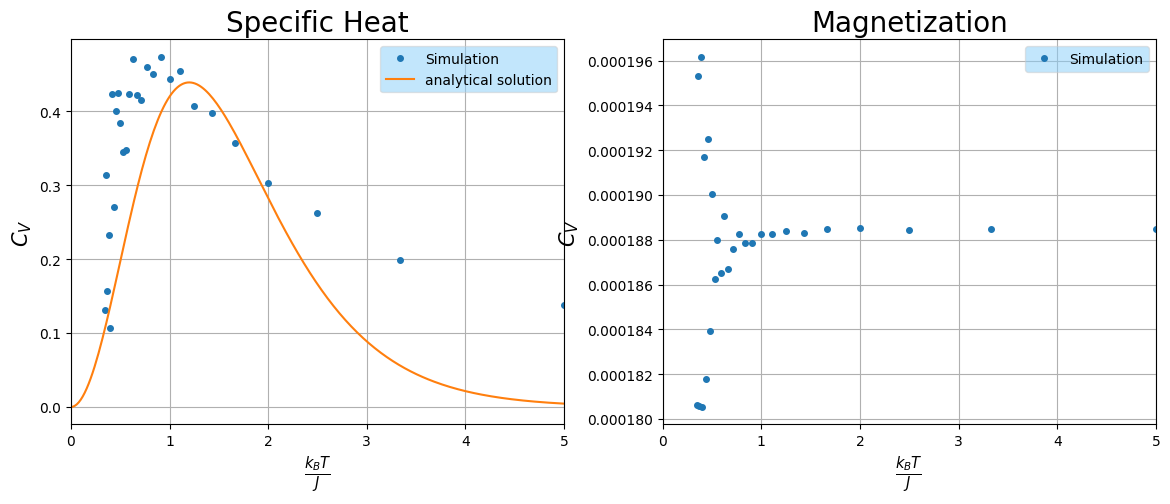

In [11]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(1/BJs, E_stds*BJs/10, ls = "", marker = "o", markersize = 4, label='Simulation')
plt.plot(BJ_range, Cv, label='analytical solution')
plt.xlabel(r'$\frac{k_BT}{J}$', size = 15)
plt.ylabel(r'$C_V$', size = 15)
plt.title("Specific Heat", size = 20)
plt.xlim(0,5)
plt.grid()
plt.legend(facecolor='lightskyblue', framealpha=0.5)
plt.subplot(1,2,2)
plt.plot(1/BJs, abs(ms/N**2), ls = "", marker = "o", markersize = 4, label='Simulation')
plt.xlabel(r'$\frac{k_BT}{J}$', size = 15)
plt.ylabel(r'$C_V$', size = 15)
plt.title("Magnetization", size = 20)
plt.xlim(0,5)
plt.grid()
plt.legend(facecolor='lightskyblue', framealpha=0.5)
plt.savefig("1DFerro_tempdep.jpg", bbox_inches='tight')